# Import necessary libraries

In [80]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Importing dataset

In [61]:
data=pd.read_csv('C:\\Users\\rajpu\\OneDrive\\Documents\\IMDb Movies India.csv', encoding='latin-1')

# Let's take alook at the first few rows of the dataset

In [62]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Data Preprocessing

# Check Null values

In [63]:
data.isnull().values.any()

True

In [64]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# You can check through heatmap

<Axes: >

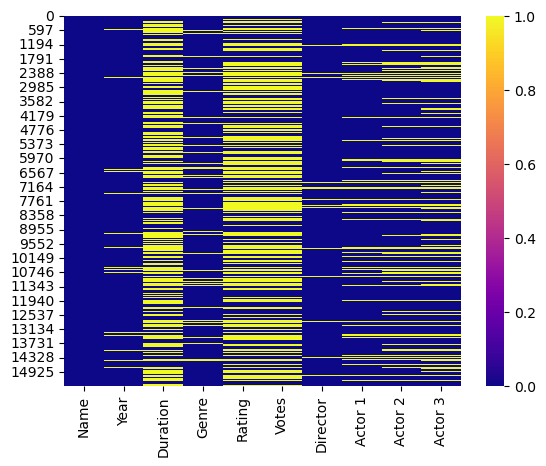

In [65]:
sns.heatmap(data.isnull(),cmap='plasma')

# Drop Null values

In [66]:
data.dropna(inplace=True)

In [67]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Drop Irrelevant column

In [68]:
data=data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1)

In [69]:
data.head(10)

,Year,Duration,Genre,Rating,Votes
1,(2019),109 min,Drama,7.0,8
3,(2019),110 min,"Comedy, Romance",4.4,35
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086"
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326
9,(2014),116 min,"Action, Crime, Thriller",4.0,11
10,(2004),96 min,Drama,6.2,17
11,(2016),120 min,Horror,5.9,59
12,(1991),161 min,"Horror, Romance, Thriller",6.5,983
13,(2012),166 min,"Comedy, Drama, Romance",5.7,512


# Converts categorical column to integer

In [70]:
data['Year']= data['Year'].str.extract('(\d+)', expand=False).astype(int)
data['Duration']= data['Duration'].str.extract('(\d+)', expand=False).astype(int)
data['Votes']= data['Votes'].str.replace(',','').astype(int)

data.head(10)

# Converts categorical  labels to numeric values.

In [73]:
label_encoder= LabelEncoder()
data['Genre']= label_encoder.fit_transform(data['Genre'])   # like (Action : 1 , Action : 2 , Action : 3 )

In [74]:
data.head(10)

,Year,Duration,Genre,Rating,Votes
1,2019,109,229,7.0,8
3,2019,110,184,4.4,35
5,1997,147,157,4.7,827
6,2005,142,289,7.4,1086
8,2012,82,320,5.6,326
9,2014,116,37,4.0,11
10,2004,96,229,6.2,17
11,2016,120,316,5.9,59
12,1991,161,323,6.5,983
13,2012,166,159,5.7,512


# Spliting Data into Features and Target

In [76]:
X = data.drop('Rating',axis=1)
y= data['Rating']
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state =42)

# Building and Training the Linear Regression Model

In [77]:
linear_model= LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

# Making Predictions using Linear Regression

In [79]:
y_pred_linear = linear_model.predict(X_test)

# Model Evaluation for Linear Regression

In [81]:
mse_linear= mean_squared_error(y_test , y_pred_linear)
print(f'Linear Regression Mean Squared Error : {mse_linear}')

Linear Regression Mean Squared Error : 1.6886564632113508


# We can use Random Forest Regression Model

In [83]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train ,y_train)

RandomForestRegressor(random_state=42)

# Making predictions using Random Forest Regression

In [84]:
y_pred_rf= rf_model.predict(X_test)

# Model Evaluation

In [87]:
mse_rf = mean_squared_error(y_test , y_pred_rf)
print(f'Random Forest Regression Mean Squared Error : {mse_rf}')

Random Forest Regression Mean Squared Error : 1.2878388951511983
